## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# number of unique users with converted = 1 divided by whole unique users
df['converted'].mean()
df.query('converted == 1').user_id.nunique()/df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
len(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") '))

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


#### There is no missing values as per above info

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#we should only use the rows that we can feel confident in the accuracy of the data.thus, will remove the rows where treatment is not aligned with new_page
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") ').index)


In [9]:
##we should only use the rows that we can feel confident in the accuracy of the data.thus, will remove the rows where control is not aligned with old_page
df2 = df2.drop(df2.query('(group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page") ').index)


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]

0

In [12]:
len(df2)

290585

#### now our new df2 contains only the rows (290585 rows)  that we can feel confident in the accuracy of the data

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

we can observe that we have 1 repeated user_id

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
#df2.user_id.value_counts().index[0]
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


user_id:773192 is repeated in our dataset

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


 user_id:773192 is repeated in rows number 1899 & 2893.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2 = df2.drop_duplicates(['user_id'])

In [17]:
df2['user_id'].duplicated().any()

False

now our dataset is cleaned from any duplicated user_id

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
# number of unique users with converted = 1 divided by whole unique users
df2.query('converted == 1').user_id.nunique()/df2.user_id.nunique()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
# first we can select control group dataframe , then get the proportion of converted users
df2_ctrl = df2.query('group == "control"')
p_ctrl= len(df2_ctrl.query('converted == 1'))/len(df2_ctrl)
p_ctrl

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
# first we can select treatment group dataframe , then get the proportion of converted users
df2_treat = df2.query('group == "treatment"')
p_treat = len(df2_treat.query('converted == 1'))/len(df2_treat)
p_treat

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
# number of unique users with (landing_page = new_page ) divided by whole unique users
len(df2.query('landing_page == "new_page"'))/len(df2)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**As from above Results. we can observe that probability of user conversion on the new treatment page (11.88%) is slightlyt lower(very close) than probability of user conversion on the old control page (12%) under same probability that an individual received the new page (50%) or the old one (50%)(same traffic per each page group).
so we do not have much evidence to say that the new treatment page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

- **null_hypothesis $$H_0: 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑   <= 0$$**
- **alternative $$H_1: 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑   > 0$$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
#Asuming 𝑝𝑛𝑒𝑤 and 𝑝𝑜𝑙𝑑 both have "true" success rates equal to the converted success rate regardless of page - that is 𝑝𝑛𝑒𝑤 and 𝑝𝑜𝑙𝑑 are equal
# converted rate in our data is number of unique users with converted = 1 divided by whole unique users
p_new= df2.query('converted == 1').user_id.nunique()/df2.user_id.nunique()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
#Asuming 𝑝𝑛𝑒𝑤 and 𝑝𝑜𝑙𝑑 both have "true" success rates equal to the converted success rate regardless of page - that is 𝑝𝑛𝑒𝑤 and 𝑝𝑜𝑙𝑑 are equal
# converted rate in our data is number of unique users with converted = 1 divided by whole unique users
p_old = df2.query('converted == 1').user_id.nunique()/df2.user_id.nunique()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [24]:
#number of rows in select treatment group dataframe
n_new = df2_treat.shape[0]
n_new

145310

d. What is $n_{old}$?

In [25]:
#number of rows in select control group dataframe
n_old = df2_ctrl.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
#generate a random sample for treatment group dataframe with n_new observations and  a convert rate of 𝑝new
new_page_converted = np.random.choice([1,0],n_new,p=[p_new , 1-p_new])


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
#generate a random sample for control group dataframe with n_old observations and  a convert rate of 𝑝𝑜𝑙𝑑
old_page_converted = np.random.choice([1,0],n_old,p=[p_old , 1-p_old])


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
#fisrt we calaculate the proportion of conversion for new & old pages (pnew & pold) then calaculate the difference
obsrv_diff = new_page_converted.mean() - old_page_converted.mean()

obsrv_diff

-0.002183912427780918

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
#generating random sampling distributions
p_diffs = []
for _ in range(10000):
    old_page_converted_ = np.random.choice([1,0],n_old,p=[p_old , 1-p_old])
    new_page_converted_ = np.random.choice([1,0],n_new,p=[p_new , 1-p_new])
    diff_ = new_page_converted_.mean() - old_page_converted_.mean()
    p_diffs.append(diff_)
   

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [30]:
#converting type of p_diffs from list to array
p_diffs = np.array(p_diffs)

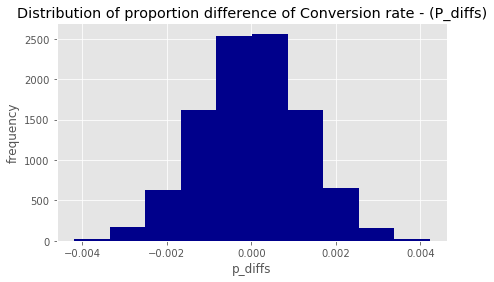

In [31]:
plt.figure(figsize=(7,4))
plt.style.use('ggplot')
plt.hist(p_diffs , color ='darkblue')
plt.title('Distribution of proportion difference of Conversion rate - (P_diffs)');
plt.xlabel('p_diffs')
plt.ylabel('frequency');

**From above graph , we can observe that the distribution of proportion difference between the conversion rate of new page and old page is normally distributed**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
# compute actualled observed difference from our dataset:
observ_diffs =  p_treat - p_ctrl
observ_diffs

-0.0015782389853555567

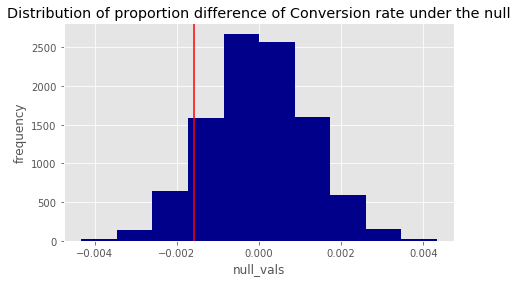

In [33]:
#computing and ploting the distribution of proportion difference between the two groups under the null
null_vals = np.random.normal(0,p_diffs.std(),p_diffs.size)
#plotting
plt.figure(figsize=(7,4))
plt.style.use('ggplot')
plt.hist(null_vals , color ='darkblue')
plt.axvline( observ_diffs , color ='red')
plt.title('Distribution of proportion difference of Conversion rate under the null');
plt.xlabel('null_vals')
plt.ylabel('frequency');


In [34]:
#calculating the P-value
pval= (null_vals > observ_diffs).mean()
pval

0.9015

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**in part j, we were checking p-value which is the probability of our observed statistic under the null(if the null is true).**

**As per above results , P-value is greater than 0.05 (type 1 error rate threshold). so, we don't have enough evidence to reject the null hypothesis. that means that the conversion rate on new treatment/page is not higher than the old control/page. thus, we recommend to not to luanch the new treatment/page and keep with the old control one.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:

import statsmodels.api as sm

convert_old = df2_ctrl.query('converted ==1').shape[0]
convert_new = df2_treat.query('converted ==1').shape[0]
n_old = df2_ctrl.shape[0]
n_new = df2_treat.shape[0]

In [36]:
convert_old

17489

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [37]:
#below function has 3 attributes: 1- number of success conversions ,2- number of observations , 3- alterantive hypothesis comparison mark:which in our case smaller
z_score,p_value = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new], alternative ='smaller')
z_score,p_value

(1.3109241984234394, 0.9050583127590245)

**In the above method, we have passed 3 attributes: 1- number of success conversions ,2- number of observations , 3- alterantive hypothesis comparison mark:which in our case is "smaller".**

**smaller means that the alternative hypothesis is p1 (p_old) < p2(p_new).**

**where it returns zstat : test statistic for the z-test , p-value for the z-test**


In [38]:
from scipy.stats import norm

#first we calculate the significance precentage of z-score using cumulative density function
print(norm.cdf(z_score))
#calculate the critical value at (1-alpha) = (1- 0.05)=95% using percent point function
print(norm.ppf(1-0.05))




0.9050583127590245
1.6448536269514722


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**As the precentage of the significance of z_score(0.905) is lower than critical value(1.6449) which means that we fail to reject the null hypothesis(𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 <=0) . which also confirms the pervious parts j,k results that the conversion rate of new of new page is not better than the old page(the perfomance of old page is equal or better than the new page).**

**pvalue(0.905) is greater than 0.05(error type 1 rate thrshold) which means that we fail to reject the null hypothesis (𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 <=0). which also confirms the pervious parts j,k results that the conversion rate of new of new page is not better than the old page(the perfomance of old page is equal or better than the new page).**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**we will use Logestic regression model to perform binary classification.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
#use get_dummies to create dummy variable for group (control/treatment)
df_dummies_group = pd.get_dummies(df2['group'])
df2 = df2.join(df_dummies_group)

In [40]:
# drop baseline for catagorical columns [control]
df2 = df2.drop(columns='control')
#rename coloumn treatment as ab_page
df2 = df2.rename(columns={'treatment':'ab_page'})


In [41]:
# adding intercept coloumn
df2['intercept'] =1

In [42]:
df2.head()


,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [43]:
#creating our logistic regression model using intercept , ab_page to predict individual converts
logit_mod = sm.Logit(df2['converted'] ,df2[['intercept','ab_page']])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
# getting model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Mar 2021   Pseudo R-squ.:               8.077e-06
Time:                        17:38:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

### for Regression model

- **null_hypothesis $$H_0: pnew = pold$$**
- **alternative $$H_1: pnew \neq  pold$$**

**The null and alternative hypotheses associated with our regression model are different from that for the null and alternative hypotheses in the Part II as they use different approaches in calculating hypothesis. where the p-value you obtained in the previous question corresponds to a one-tailed test. while the test implied by the regression model is a two tailed test.**

**This is because a high p-value for ab_page in the regression model means that there is no correlation between the landing page type and the conversion rate. This implies that p_new is equal to p_old. which is the null hypothesis of a two tailed test as in regression the test implied is a two tailed as per below formulas**

- **null_hypothesis $$H_0: pnew = pold$$**
- **alternative $$H_1: pnew \neq  pold$$**


**The p-value associated with ab_page from logistic regression model is 0.19. which means ab_page is not a statistically significant to predict the converts**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**considering more factors to add to our regression model (especially if these variables coefficients are statistically significant) will improve the predication of converts thus will improve the model performance.** 

**the disadvantage of adding more factors might lead to multi-collinearity problem where one variable is correlated with one another which cause below issues:**

**1- the expected relationships between our variables and the response may not hold(that is the relationship between the explanatory variables and the response in multiple linear regression case may differ from that based on the bivariate relationships.**

**2- Our hypothesis testing results may not be reliable. that our coefficient estimates are less stable as standard deviations associated with our regression coefficients are quite large.**

**However, adding more variables that their cofficients are statistically significant will make the interpreting of our coefficients more difficult as it will become more complex.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')


In [46]:
#checking unique country values
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

lowest samples are for  CA

In [47]:
### Create the necessary dummy variables and droping CA (as baseline) with low samples count
df_dummies_country = pd.get_dummies(df_new['country'])
df_dummies_country.drop(columns=['CA'],inplace=True)
df_new = df_new.join(df_dummies_country)


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
### Fit Your Linear Model And Obtain the Results
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
logit_model = sm.Logit(df_new['converted'] ,df_new[['intercept','ab_page','UK','US','US_ab_page','UK_ab_page']])
results_2 = logit_model.fit()
results_2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Mar 2021   Pseudo R-squ.:               3.482e-05
Time:                        17:38:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

In [49]:
# getting exact values of cofficients that will be used in our summary
np.exp(results_2.params)

intercept     0.134794
ab_page       0.934776
UK            1.011854
US            1.017682
US_ab_page    1.048001
UK_ab_page    1.081428
dtype: float64

In [50]:
1/np.exp(results_2.params)

intercept     7.418713
ab_page       1.069775
UK            0.988285
US            0.982625
US_ab_page    0.954198
UK_ab_page    0.924703
dtype: float64

<a id='conclusions'></a>
## Conclusions

- **Pval values show that ab_page,UK,US,US_ab_page,UK_ab_page cofficients are not statistically significant to predict the converts. this means there is no correlation between the landing page type or the country where the user opens page and the conversion rate(couldn't reject that p_new = p_old) ,which practicaly means that new_page/treatment will not brought additional improvement in conversion rate than the old one and no need to upgarde.**


- **Below are interpretations for some coffiecients in our model:**


- if one unit increase in **opening new_page/treatment** will likely increase the odd of converts by **0.93** if other variables remain constant.
- if one unit increase in **opening a page from US** will likely increase the odd of converts by **1.02** compared to  a page opened from **CA** if other variables remain constant.
- if one unit increase in **opening a page from UK** will likely increase the odd of converts by **1.01** compared to  a page opened from **CA** if other variables remain constant.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.